# <font color='green'><b> Edge detection </b></font>


### Credits: Hands-on Image Processing with Python, Chapter 5 - Author: Sandipan Dey


## <font color='green'><b>Base Dir setup</b></font>

In [11]:
#@title ▶️ Base dir setup
import os, sys

# check if hosted (Google VM) or running on local server
if 'google.colab' in sys.modules:
  #@markdown Google Drive root folder - hosted by Google VM (adapt to your local paths)
  from google.colab import drive
  drive.mount('/content/drive', force_remount=False)
  base_dir = 'infoMM/' #@param {type: "string"}
  base_dir  = os.path.join('/content/drive/MyDrive/', base_dir)
  #!pip install pillow  --upgrade
  img_dir = 'data/img/'
  vid_dir = 'data/video/'
  out_dir = 'output/'
  
  # move to base_dir 
  os.chdir(base_dir)
else:
  #@markdown Path to local folder on PC (adapt to your local paths)
  img_dir = '../Immagini_IN/'
  out_dir = '../Immagini_OUT/'

 

print("Current dir:", os.getcwd())

Current dir: c:\Users\eumir\Desktop\Università\Anno III\Semestre 1\Informazione Multimediale\Lab 6


## <font color='green'><b>Import libraries</b></font>

In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import plotly.express as px       # TUTORIAL: https://plotly.com/python/getting-started/
import plotly.graph_objects as go 
import math
from plotly.subplots import make_subplots  
from skimage.io import imread
from skimage.color import rgb2gray
 

In [13]:
def multiPlots(images, titles= [], nCols = 2):

  '''multiPlots funtion allows to plot a list of images organized on nCols, with possible titles'''
  
  plt.gray() 
  nImg =len(images)
  nRows = math.ceil(nImg/nCols) 
  f = plt.figure(figsize=(10,4*nRows))

  for n, image in enumerate(images): 
    row = int(n/nCols)+1
    col = n%nCols+1
    ax = f.add_subplot(nRows, nCols, n+1)
    ax.imshow(image)   
    plt.axis('off')
    if titles:
      plt.title(titles[n]) 


## <font color='green'><b>Load an Image</b></font>

 



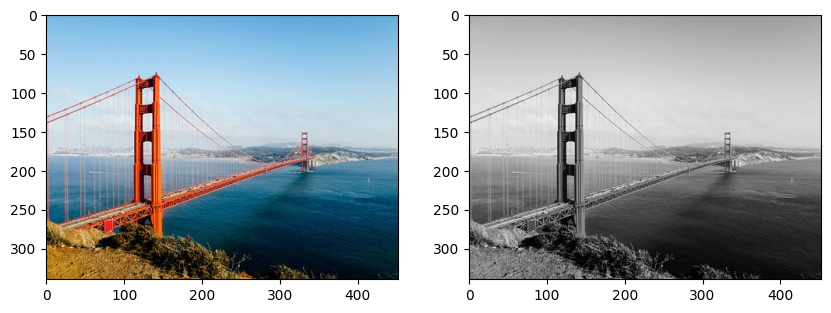

In [14]:
# load an example image 
img = imread(img_dir +  'goldengate.jpg')

# show image (RGB and Gray)
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(img)
grayImg = rgb2gray(img)
 
plt.subplot(122)
plt.imshow(grayImg, cmap='gray')
plt.show()
#print(grayImg.dtype)

### <font color='green'><b>Edge detection via 1st and 2nd order derivatives with the *Opencv*</b></font>


*Goal:*

We will learn to use the functions cv2.Sobel(), cv2.Scharr(), cv2.Laplacian()
 
**Theory**

OpenCV provides three types of gradient filters or High-pass filters, Sobel, Scharr and Laplacian. We will see each one of them.

**1. Sobel Derivatives**

Sobel operators is a joint Gaussian smoothing plus differentiation operation, so it is more resistant to noise. You can specify the direction of derivatives to be taken, vertical or horizontal (by the arguments, yorder and xorder respectively). You can also specify the size of kernel by the argument ksize.  


$Sobel Operator [X-axis] = \begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1  \end{bmatrix}$

$Sobel Operator [Y-axis] = \begin{bmatrix} 1 & 2 & 1 \\ 0 & 0 & 0 \\ -1 & -2 & -1  \end{bmatrix}$

**2. Scharr Filters**

Scharr as a kernel so defined:
 
$Scharr Operator [X-axis] = \begin{bmatrix} -3 & 0 & 3 \\ -10 & 0 & 10 \\ -3 & 0 & 3  \end{bmatrix}$

$Scharr Operator [Y-axis] = \begin{bmatrix} 3 & 10 & 3 \\ 0 & 0 & 0 \\ -3 & -10 & -3  \end{bmatrix}$

Schould be more precise than Sobel
 


**3. Laplacian Derivatives**

It calculates the Laplacian of the image given by the relation, $\Delta(src) = \frac{\partial ^2{src}}{\partial x^2} + \frac{\partial ^2{src}}{\partial y^2}$ where each derivative is found using Sobel derivatives. If ksize = 1, then following kernel is used for filtering:

$kernel = \begin{bmatrix} 0 & 1 & 0 \\ 1 & -4 & 1 \\ 0 & 1 & 0  \end{bmatrix}$

**Code**

Below code shows all operators in a single diagram. Depth of output image is passed cv2.CV_64F to get the result in floating point

### <font color='green'><b> Gradient via Prewitt </b></font>


Before using the built-in functions, let start defining the Prewitt kernel, applying it with the `cv2.filter2D` function.  

In [15]:
#define the kernel for the partial derivative  in y
kernel_y = np.array([[-1, -1, -1],
                     [0 ,  0,  0],
                     [1 ,  1,  1]]); 

# the kernel for the  x-derivative is the transpose of "kernel_y"
kernel_x = np.transpose(kernel_y); 

#partial derivatives
gy = cv2.filter2D(grayImg, -1, kernel_y); #https://www.tutorialspoint.com/opencv/opencv_filter2d.htm
gx = cv2.filter2D(grayImg, -1, kernel_x);  
#print(gy.dtype)

#magnitude
magnitude = np.sqrt(gx**2 + gy**2)
magnitude /= np.max(magnitude);
magnitude = np.uint8(magnitude*255);

#orientation
theta = cv2.phase(np.array(gx ), np.array(gy), angleInDegrees=True)

#### Plot Orientations (skip details)

In [16]:
def plot_orientations(theta):
      #INPUT: theta: orientation maps
  
  image_map = np.zeros((theta.shape[0], theta.shape[1], 3), dtype=np.int16)

  # Define RGB colours
  red = np.array([255, 0, 0])
  cyan = np.array([0, 255, 255])
  green = np.array([0, 255, 0])
  yellow = np.array([255, 255, 0])

  # Set colours corresponding to angles
  for i in range(0, image_map.shape[0]):
    for j in range(0, image_map.shape[1]):
        if theta[i][j] < 90.0:
            image_map[i, j, :] = red
        elif theta[i][j] >= 90.0 and theta[i][j] < 180.0:
            image_map[i, j, :] = cyan
        elif theta[i][j] >= 180.0 and theta[i][j] < 270.0:
            image_map[i, j, :] = green
        elif theta[i][j] >= 270.0 and theta[i][j] < 360.0:
            image_map[i, j, :] = yellow

  # Display gradient orientation
  f, ax1 = plt.subplots(1, 1, figsize=(5,4))

  ax1.set_title('gradient orientation')
  ax1.imshow(image_map)
  ax1.axis('off')
  return image_map.astype('uint8')



##### - variant: **plot_orientationsMASK**
As we can see, the magnitude and orientation are computed at each position (x,y). 

However, not all these values are relevant.
Let's try to clean up these maps.
 
**1. Cleaning criterion:**
- TH = 98 percentile of the magnitude 

- if magnitude(x,y) < TH than
    magnitude(x,y) =0 
    orientation = -1 
 
**2. Plot the cleaned orientation map**
Observe that, to plot the cleaned orientation map, you should modify the plot_orientations function (let call the modified function `plot_orientationsMASK`) so that, in case of value -1, it plots black.

In [17]:
def plot_orientationsMASK (theta, magnitude, perc=95):
    '''This function plot the theta corresponding to the strongest magnitude values
   INPUT: 
    - theta: orientation maps
    - magnitude: magnitude of the gradient
    - percentile: percentile of the strongest magnitude'''
    image_map = np.zeros((theta.shape[0], theta.shape[1], 3), dtype=np.int16)


    #1. Determine the threshold as a certain percentile of the magnitude
    TH =  np.percentile(magnitude, perc) 

    #2. Clean the theta and mag maps accordingly
    theta[magnitude < TH] = -1;
    
    # Define RGB colours
    red = np.array([255, 0, 0])
    cyan = np.array([0, 255, 255])
    green = np.array([0, 255, 0])
    yellow = np.array([255, 255, 0])

    # Set colours corresponding to angles
    for i in range(0, image_map.shape[0]):
        for j in range(0, image_map.shape[1]):
            if theta[i][j] < 90.0 and theta[i][j] >0:  # JUST EXCLUDE THE NEGATIVE VALUES FROM THIS CASE, 
                                                    # LEAVING THEM TO ZERO AS IN THE INITIALIZATION
                image_map[i, j, :] = red
            elif theta[i][j] >= 90.0 and theta[i][j] < 180.0:
                image_map[i, j, :] = cyan
            elif theta[i][j] >= 180.0 and theta[i][j] < 270.0:
                image_map[i, j, :] = green
            elif theta[i][j] >= 270.0 and theta[i][j] < 360.0:
                image_map[i, j, :] = yellow

    # Display gradient orientation
    f, ax1 = plt.subplots(1, 1, figsize=(10,5))

    ax1.set_title('gradient orientation')
    ax1.imshow(image_map)
    return image_map

<Figure size 640x480 with 0 Axes>

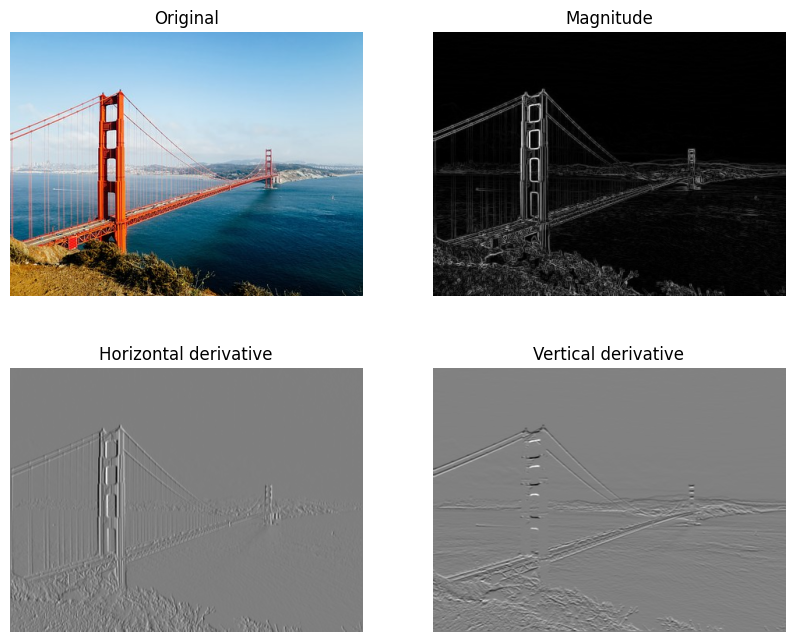

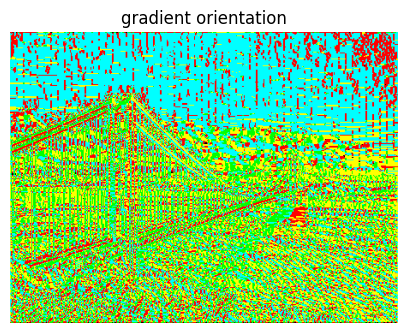

In [18]:
# visualization:

multiPlots ([img, magnitude, gx, gy], 
            ['Original', 'Magnitude', 'Horizontal derivative', 'Vertical derivative'])

plot_orientations(theta);

#### <font color='green'><b>EXERCISE 1: </b></font>

1. Define the Sobel kernels,
2. extract the partial derivatives, 
3. compute the magnitude, and  
4. the phase (hint: use the function cv2.phase, search documentation at: https://docs.opencv.org/) 

5. Then, plot the magnitude and the orientation maps, this last using the given function `plot_orientations` or `plot_orientationsMASK` 

<Figure size 640x480 with 0 Axes>

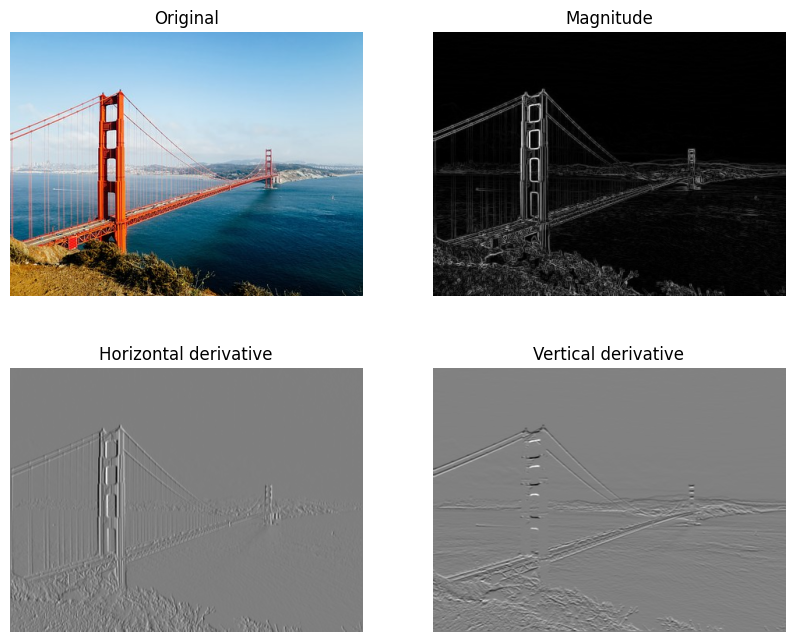

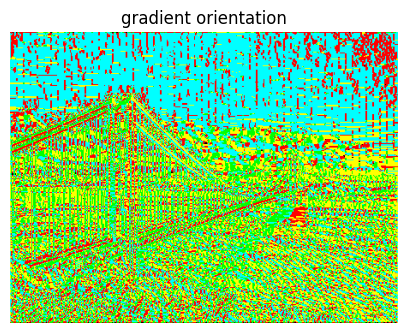

In [19]:
#TO DO

#1. Define the 3x3 sobel filters for edge detection
sobel_y = np.array([[-1,-1,-1],
                   [0 , 0, 0],
                   [1 , 1, 1]])

sobel_x = np.transpose(sobel_y)
 
#2. Filter the grayscale image using the defined filters and the cv2.filter2D funcion
gx = cv2.filter2D(grayImg, -1, sobel_x)
gy = cv2.filter2D(grayImg, -1, sobel_y) 

#3. Compute the magnitude 'magnitude'
magnitude = np.sqrt(gx**2 + gy**2)
magnitude /= np.max(magnitude)
magnitude = np.uint8(magnitude*255)
#magnitude
 
 
#4. Compute the orientations 'theta' 
theta = cv2.phase(np.array(gx ), np.array(gy), angleInDegrees=True)

#5. visualizations
multiPlots ([img, magnitude, gx, gy], 
            ['Original', 'Magnitude', 'Horizontal derivative', 'Vertical derivative'])

plot_orientations(theta);


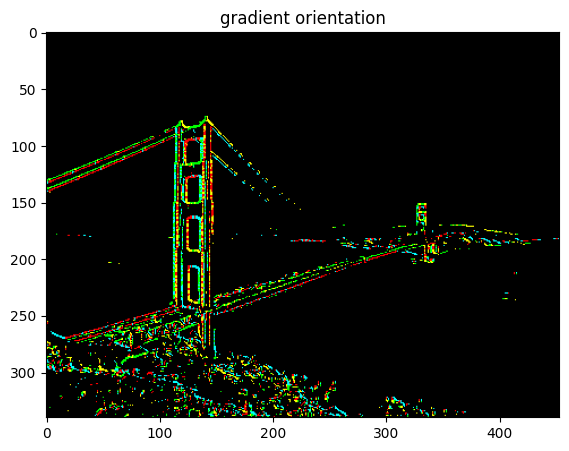

In [20]:
#Plot the phase in correspondence of the high values of magnitude only:
theta_map = plot_orientationsMASK(theta, magnitude, 95) 


### <font color='green'><b>Gradient via Sobel built-in </b></font>


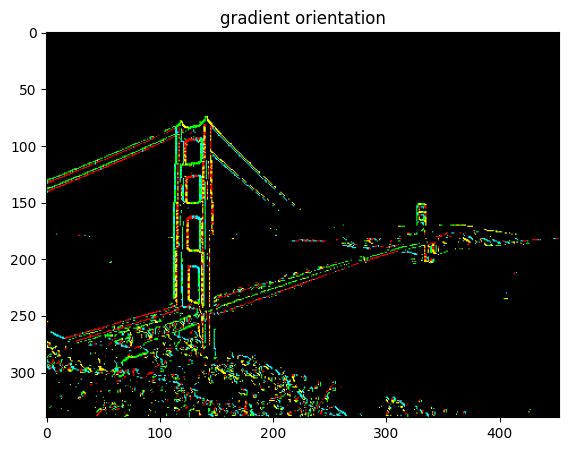

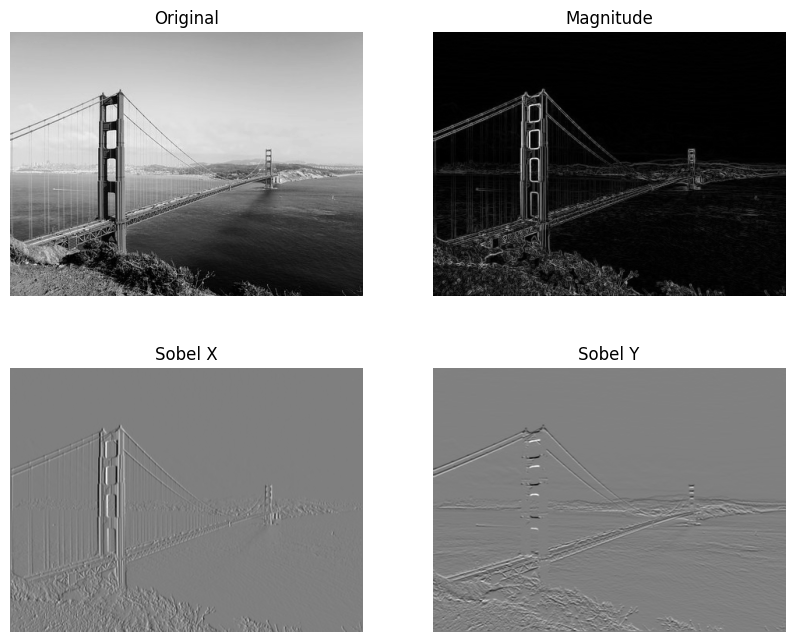

In [21]:
# SOBEL

sobelx = cv2.Sobel(grayImg, -1,1,0) #last 2 parameters: x_order and y_order
sobely = cv2.Sobel(grayImg, -1,0,1)

mag = cv2.magnitude(sobelx, sobely)
theta = cv2.phase(np.array(sobelx), np.array(sobely), angleInDegrees=True)

theta_map = plot_orientationsMASK(theta, mag, 95) 
multiPlots([grayImg, mag, sobelx, sobely ], ['Original', 'Magnitude','Sobel X', 'Sobel Y'])
  

### <font color='gray'><b>Gradient via Scharr built-in </b></font>

 

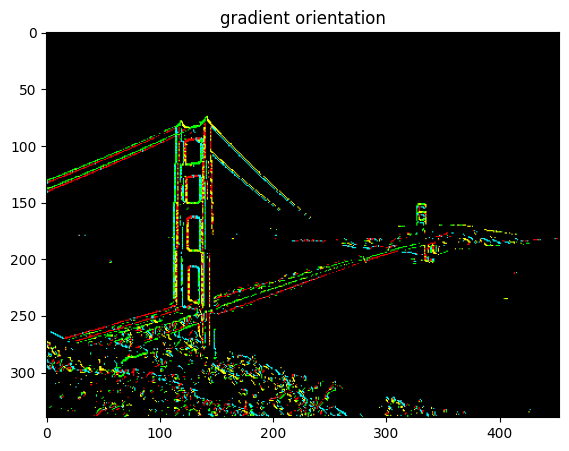

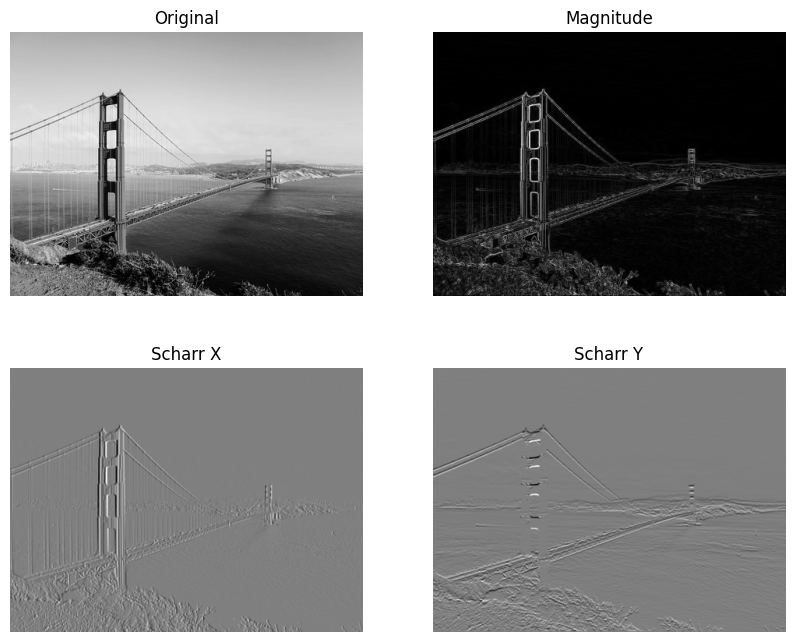

In [22]:
# SCHARR
scharrx = cv2.Scharr(grayImg, cv2.CV_64F,1,0)  
scharry = cv2.Scharr(grayImg, cv2.CV_64F,0,1)

mag = cv2.magnitude(scharrx, scharry)
theta = cv2.phase(np.array(scharrx), np.array(scharry), angleInDegrees=True)

theta_map = plot_orientationsMASK(theta, mag, 95) 
multiPlots([grayImg, mag, scharrx, scharry ], ['Original', 'Magnitude','Scharr X', 'Scharr Y'])
  


### <font color='green'><b>Second order derivative: the Laplacian </b></font>

#### Zero Crossing (skip details)

In [23]:
def Zero_crossing(image):
#INPUT: image: image filtered with the Laplacian

    z_c_image = np.zeros(image.shape)
    
    # For each pixel, count the number of positive
    # and negative pixels in the neighborhood
    
    for i in range(1, image.shape[0] - 1):
        for j in range(1, image.shape[1] - 1):
            negative_count = 0
            positive_count = 0
            neighbour = [image[i+1, j-1],image[i+1, j],image[i+1, j+1],image[i, j-1],image[i, j+1],image[i-1, j-1],image[i-1, j],image[i-1, j+1]]
            d = max(neighbour)
            e = min(neighbour)
            for h in neighbour:
                if h>0:
                    positive_count += 1
                elif h<0:
                    negative_count += 1
 
 
            # If both negative and positive values exist in 
            # the pixel neighborhood, then that pixel is a 
            # potential zero crossing
            
            z_c = ((negative_count > 0) and (positive_count > 0))
            
            # Change the pixel value with the maximum neighborhood
            # difference with the pixel
 
            if z_c:
                if image[i,j]>0:
                    z_c_image[i, j] = image[i,j] + np.abs(e)
                elif image[i,j]<0:
                    z_c_image[i, j] = np.abs(image[i,j]) + d
                
    # Normalize and change datatype to 'uint8' (optional)
    z_c_norm = z_c_image/z_c_image.max()*255
    z_c_image = np.uint8(z_c_norm)
 
    return z_c_image


#### <font color='green'><b>The opencv function to apply the Laplacian to an image</b></font>
 

In [24]:
# LAPLACIAN

laplacian = cv2.Laplacian(grayImg,-1) 
ZC = Zero_crossing(laplacian)
fig = px.imshow(laplacian, color_continuous_scale='gray', title= 'Laplacian')
fig.show()
fig = px.imshow(ZC, color_continuous_scale='gray', title='Zero Crossing')
fig.show()

### <font color='gray'><b>Edge detection with Skimage</b></font>

<Figure size 640x480 with 0 Axes>

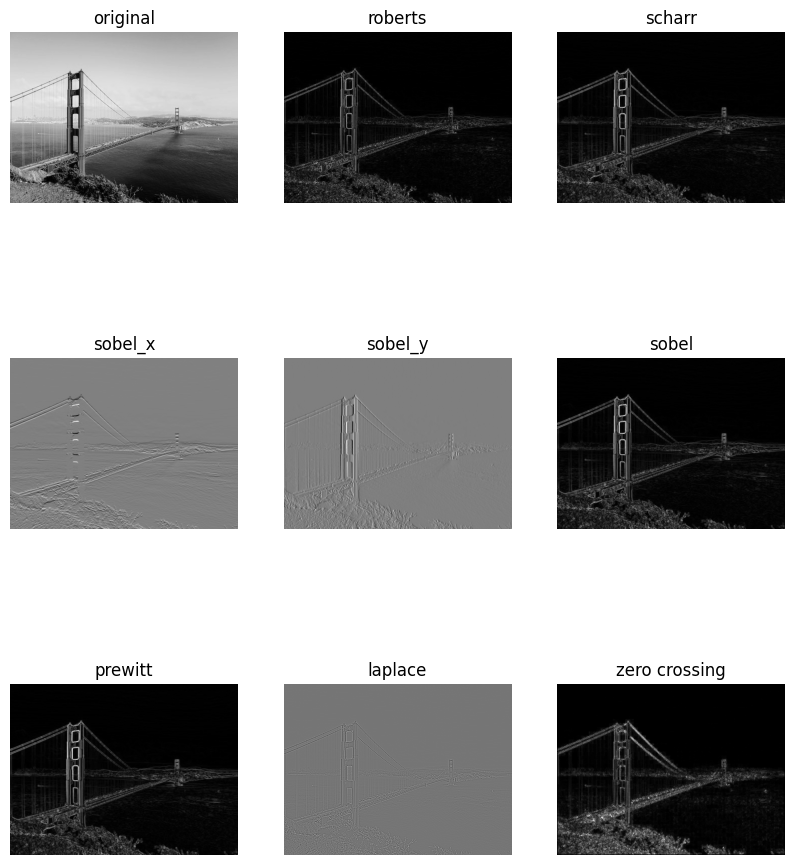

In [25]:
from skimage import filters, feature, img_as_float

plt.gray()
images = []
titles = []

images.append(grayImg)
titles.append('original')


rob = filters.roberts(grayImg)
images.append(rob)
titles.append('roberts')

sch = filters.scharr(grayImg)
images.append(sch)
titles.append('scharr')

sob_x = filters.sobel_h(grayImg)
images.append(sob_x)
titles.append('sobel_x') 

sob_y = filters.sobel_v(grayImg)
images.append(sob_y)
titles.append('sobel_y') 

sob = filters.sobel(grayImg)
images.append(sob)
titles.append('sobel') 

prew = filters.prewitt(grayImg)
images.append(prew)
titles.append('prewitt')

lap = filters.laplace(grayImg)
images.append(lap)
titles.append('laplace')

ZC = Zero_crossing(lap) #my function
images.append(ZC)
titles.append('zero crossing')

multiPlots(images, titles, 3)

## <font color='green'><b>Marr-Hildreth algorithm </b></font>

#### <font color='green'><b>EXERCISE 2: </b></font>
  
Implement the Marr-Hildreth algorithm as a function, either drawing the LoG mask directly implementing:


$\begin{bmatrix}
0 & 0 & -1 & 0 & 0 \\
0 & -1 & -2 & -1 & 0 \\
-1 & -2 & 16 & -2 & -1 \\
0 & -1 & -2 & -1 & 0 \\
0 & 0 & -1 & 0 & 0
\end{bmatrix}$

or applying the parametric Laplacian to the Gaussian to get the filter.


- SOLUTION 1: Implentation using the mask


In [26]:
#TO DO
def MarrHildreth_Kernel(img):

  # 1. Draw the LoG filter 
  kernel = np.array([[0,0,-1,0,0],
                     [0,-1,-2,-1,0],
                     [-1,-2,16,-2,-1],
                     [0,-1,-2,-1,0],
                     [0,0,-1,0,0]])

  # 2. Apply it to the gray image
  Marr  = cv2.filter2D(img, -1, kernel)

  # 3. Find the Zero-Crossing
  zero = Zero_crossing(Marr)
  
  # 4. Visualization
  multiPlots([zero], ['Zero crossing']) 


<Figure size 640x480 with 0 Axes>

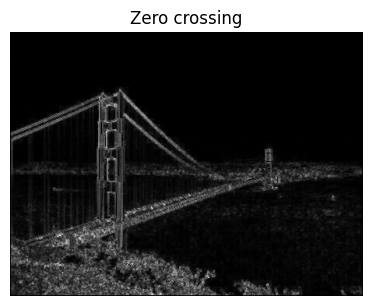

In [27]:
edges = MarrHildreth_Kernel(grayImg)

- SOLUTION 2: Implementation by scratch. Hint: use the function `cv2.getGaussianKernel` to generate the gaussian kernel


In [28]:
def LoG_filter (sigma=1):
  kernel_dim = 3*2*sigma + 1

  #filtro gaussiano 1D
  kernel = cv2.getGaussianKernel(kernel_dim, sigma)

  #creo il filtro gaussiano 2D
  g_2D = kernel * np.transpose(kernel)

  #unisco il filtro gaussiano 2D con il laplaciano
  LogFilter = cv2.Laplacian(g_2D, cv2.CV_64F)

  return LogFilter

In [29]:
def MarrHildreth(img, sigma=1):
  # 1. define the LoG filter as a function of sigma

   
  kernel_LoG = LoG_filter(sigma)

  # 2. apply it to the image

  LoG = cv2.filter2D(img, -1, kernel_LoG)

  # 3. Find the zero-crossing
  ZC = Zero_crossing(LoG)
  
  #4. Visualization
  multiPlots([ZC],["Zero crossing"])
  return ZC
  

<Figure size 640x480 with 0 Axes>

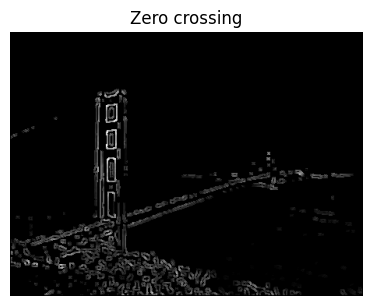

In [30]:
edges = MarrHildreth(grayImg, 2)

### <font color='green'><b>Canny Edge Detection</b></font>


### In Opencv 

OpenCV puts all the above in single function, cv2.Canny(). We will see how to use it.
Arguments: 
1. input image  
2. minVal 
3. maxVal  

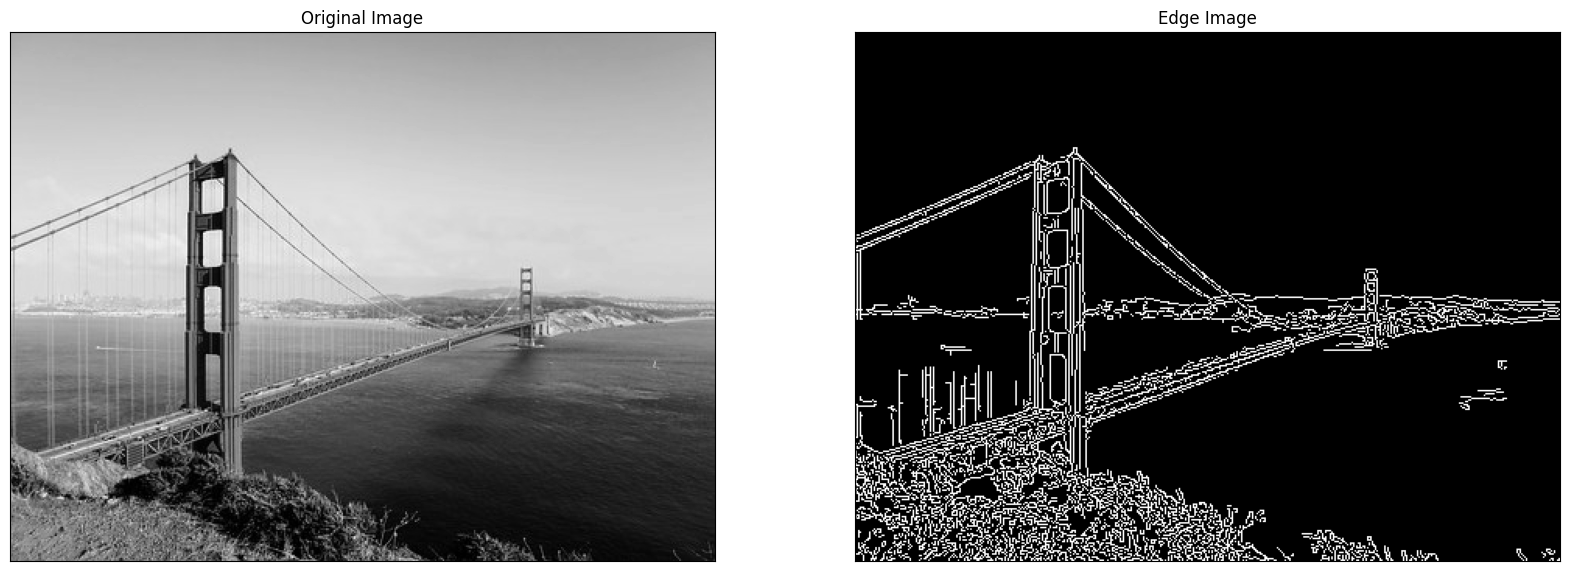

In [31]:
from skimage import img_as_float, img_as_ubyte

edges = cv2.Canny(img_as_ubyte(grayImg),100,200) # https://docs.opencv.org/master/da/d22/tutorial_py_canny.html

plt.figure(figsize=(20,10))
plt.subplot(121),plt.imshow(grayImg,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

### Canny edge detection in *Skimage* 
here we can select the sigma but not the thresholds for the hysteresis

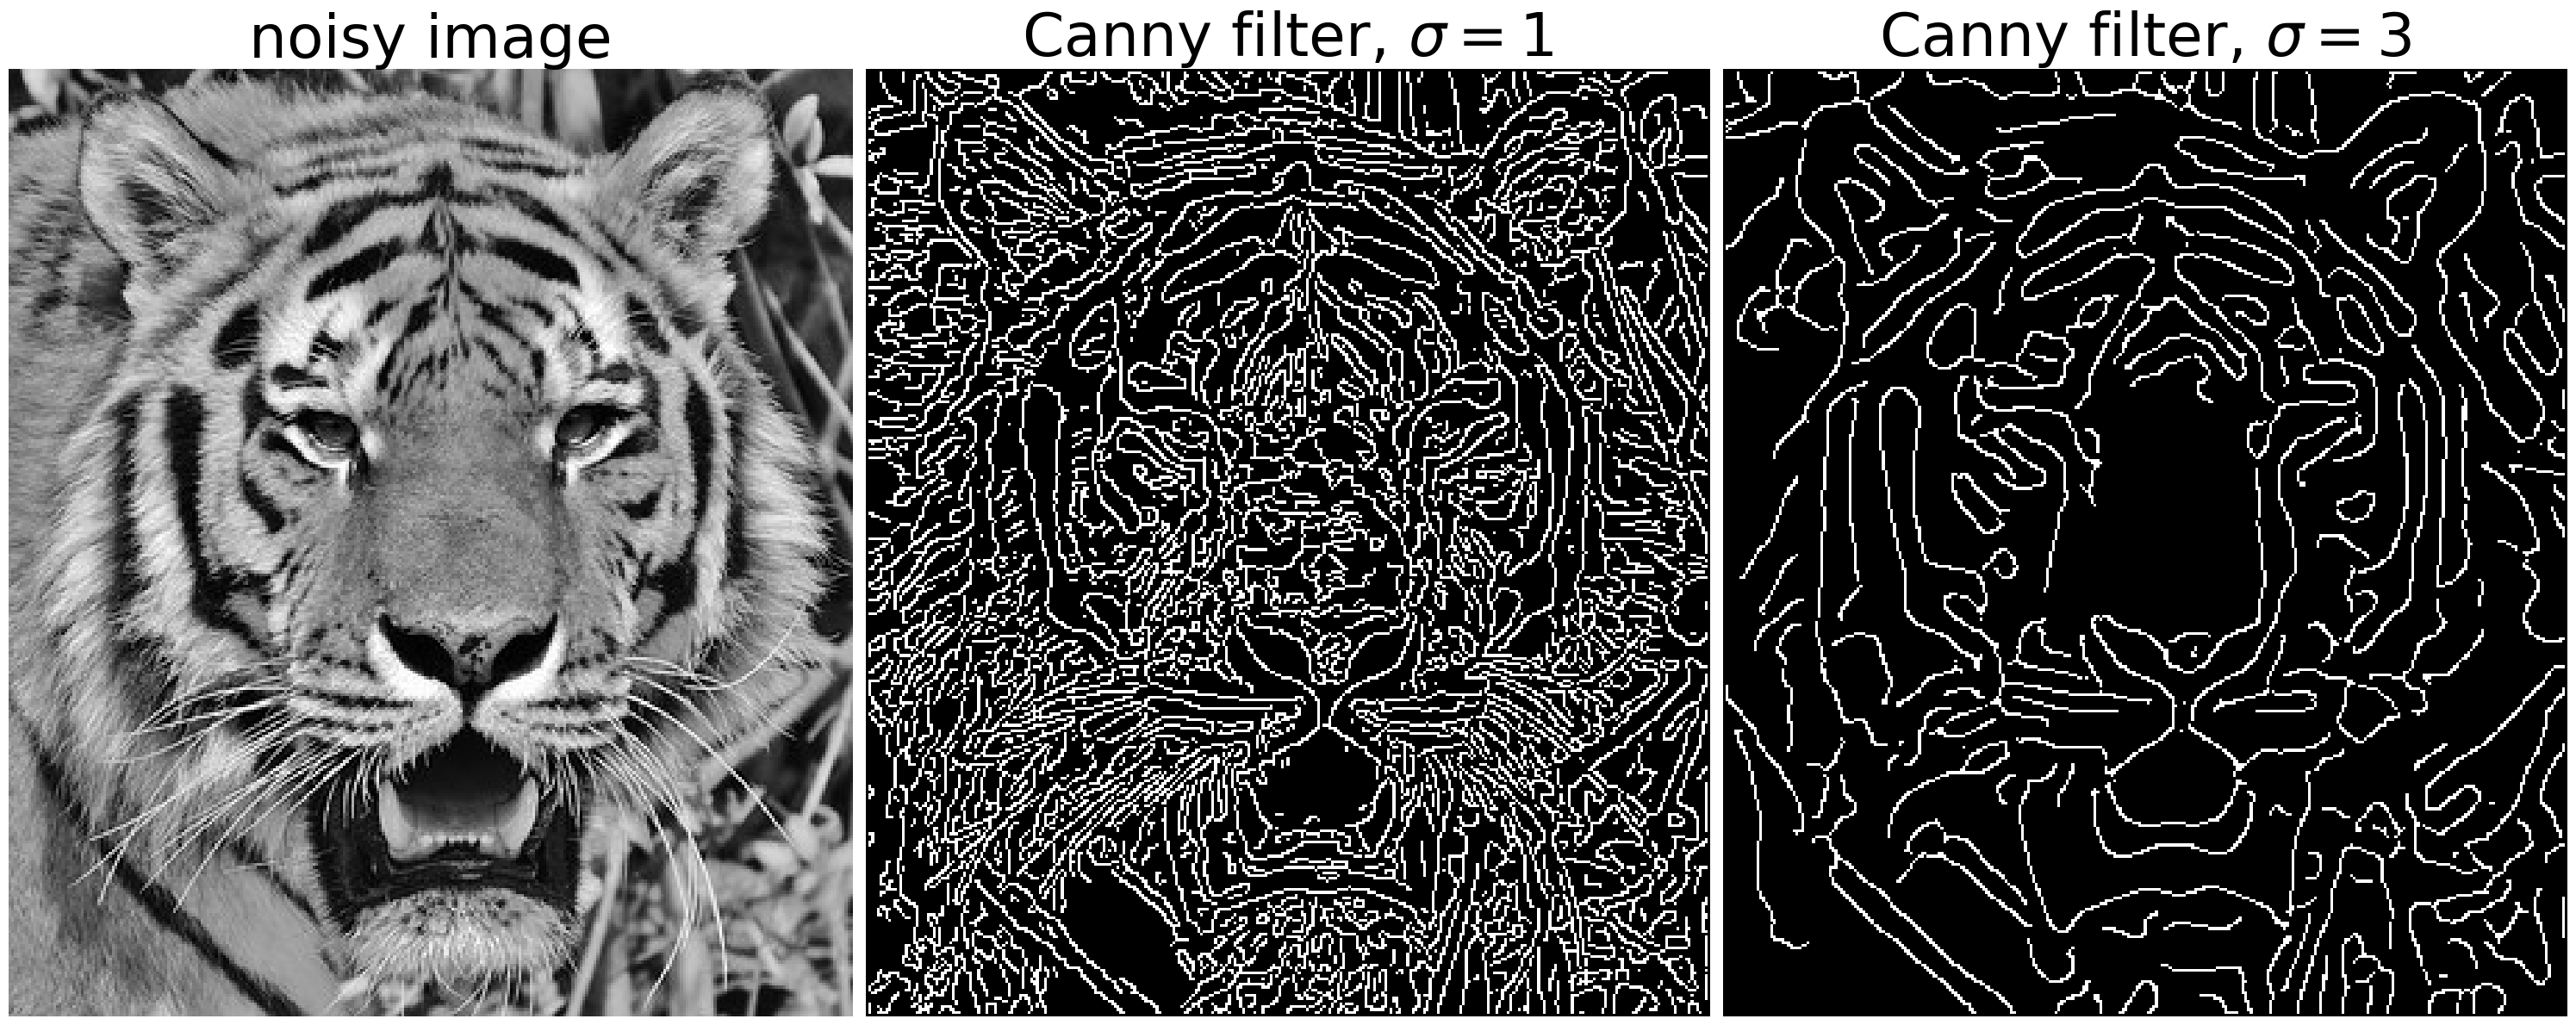

In [32]:
from skimage import feature

im = rgb2gray(imread(img_dir + 'tiger3.jpg'))
 
edges1 = feature.canny(im)
edges2 = feature.canny(im, sigma=3)
fig, (axes1, axes2, axes3) = plt.subplots(nrows=1, ncols=3, figsize=(30,
12), sharex=True, sharey=True)
axes1.imshow(im, cmap=plt.cm.gray), axes1.axis('off'),
axes1.set_title('noisy image', fontsize=50)
axes2.imshow(edges1, cmap=plt.cm.gray), axes2.axis('off')
axes2.set_title('Canny filter, $\sigma=1$', fontsize=50)
axes3.imshow(edges2, cmap=plt.cm.gray), axes3.axis('off')
axes3.set_title('Canny filter, $\sigma=3$', fontsize=50)
fig.tight_layout()
plt.show()

### <font color='green'><b>Canny Edge Detection step by step </b></font>

**OBSERVATION**: the implementation in the cv2 library, does not allow to modify the sigma characterizing the smoothing, and the skimage implamentation, dually does not allow to set the threshold for the hysteresis. 
Below, Canny step by step with all the parameters free to be set(https://towardsdatascience.com/canny-edge-detection-step-by-step-in-python-computer-vision-b49c3a2d8123): 

In [33]:
from _plotly_utils.colors.sequential import Magenta
def grad_filters(img):
# first derivative extraction and magnitude and orientation computation

    Kx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], np.float32)
    Ky = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], np.float32)
     
    Ix = cv2.filter2D(img, -1, Kx)
    Iy = cv2.filter2D(img, -1, Ky)
    
    mag = np.hypot(Ix, Iy)
    mag = mag / mag.max() * 255
    theta = np.arctan2(Iy, Ix)
 
    return (mag, theta)

In [34]:
# SKIP details
def non_max_suppression(img, D):
# INPUT: 
# - img: magnitude map 
# - D: orientation map, 
# OUTPUT:
# - Z: filtered "img" according to the non-maxima suppression algorithm   
  
    M, N = img.shape
    Z = np.zeros((M,N), dtype=np.int32)
    angle = D * 180. / np.pi
    angle[angle < 0] += 180
     
    for i in range(1,M-1):
        for j in range(1,N-1):
            try:
                q = 255
                r = 255
                
               #angle 0
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    q = img[i, j+1]
                    r = img[i, j-1]
                #angle 45
                elif (22.5 <= angle[i,j] < 67.5):
                    q = img[i+1, j-1]
                    r = img[i-1, j+1]
                #angle 90
                elif (67.5 <= angle[i,j] < 112.5):
                    q = img[i+1, j]
                    r = img[i-1, j]
                #angle 135
                elif (112.5 <= angle[i,j] < 157.5):
                    q = img[i-1, j-1]
                    r = img[i+1, j+1]

                if (img[i,j] >= q) and (img[i,j] >= r):
                    Z[i,j] = img[i,j]
                else:
                    Z[i,j] = 0

            except IndexError as e:
                pass
    
    return Z

In [35]:
# SKIP details
def threshold(img, lowThreshold=10, highThreshold=100):
 
    M, N = img.shape
    res = np.zeros((M,N), dtype=np.int32)
    
    weak = np.int32(25)
    strong = np.int32(255)
    
    strong_i, strong_j = np.where(img >= highThreshold)
    zeros_i, zeros_j = np.where(img < lowThreshold)
    
    weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))
    
    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak
    
    return (res, weak, strong)

In [36]:
# SKIP details
def hysteresis(img, lowThreshold=10, highThreshold=100):

    [img, weak, strong] = threshold(img, lowThreshold, highThreshold)
    M, N = img.shape  
    for i in range(1, M-1):
        for j in range(1, N-1):
            if (img[i,j] == weak):
                try:
                    if ((img[i+1, j-1] == strong) or (img[i+1, j] == strong) or (img[i+1, j+1] == strong)
                        or (img[i, j-1] == strong) or (img[i, j+1] == strong)
                        or (img[i-1, j-1] == strong) or (img[i-1, j] == strong) or (img[i-1, j+1] == strong)):
                        img[i, j] = strong
                    else:
                        img[i, j] = 0
                except IndexError as e:
                    pass
    return img

### Main of Canny edge detector 

In [37]:
#Main cannyEdgeDetector
sigma=3
lowThreshold= 10  
highThreshold= 50  
kernel_size=3*2*sigma + 1  

# load an example image 
im = imread(img_dir +  'goldengate.jpg')
grayImg = rgb2gray(im)

# 1. Gaussian filtering 
g = cv2.getGaussianKernel(kernel_size, sigma)
g_2D = g*np.transpose(g)
smoothed= cv2.filter2D (grayImg, -1, g_2D)

# 2. First derivative
[M, theta] = grad_filters(smoothed)

#3. Non_max_suppression
Selected = non_max_suppression(M, theta)

#4. Hysteresis 
edges = hysteresis(Selected, lowThreshold, highThreshold)

fig = px.imshow(edges, color_continuous_scale='gray', title= 'Canny edge detection')
fig.show() 

#### <font color='green'><b>EXERCISE 3 </b></font>
 
Write a function `cannyParametric()` explointing the script above, while instead of applying the Gaussian and the gradient filters separately, adopt the Derivative of Gaussian 


In [38]:
def DoG_kernel(sigma=1):
   '''Given the desired  "sigma" of the Gaussian, 
       define the filters, Fx and Fy, corresponding to the partial derivatives of the Gaussian'''

    #TO DO
   kernel_size = 3*2*sigma + 1 
    #1. define the Gaussian filter  
   g = cv2.getGaussianKernel(kernel_size, sigma)
   g2D = g * cv2.transpose(g)

    #2. define the derivantive kernels
   Kx = np.array([[-1,0,1],
                  [-1,0,1],
                  [-1,0,1]])
   
   Ky = np.array([[1,1,1],
                  [0,0,0],
                  [-1,-1,-1]])
   
    #3. compute the derivatives of the Gaussian
   Fx = cv2.filter2D(g2D, -1, Kx)
   Fy = cv2.filter2D(g2D, -1, Ky)  

   return(Fx, Fy)

In [42]:
#TO DO
def DoG_first_derivative (img,   sigma=1):
  # given the gray scale image "img", and the desired  "sigma" of the Gaussian:

  # 1. derive the DoG filter kernels
  [Fx, Fy] = DoG_kernel(sigma)
  
  # 2. apply them to "img"
  Ix = cv2.filter2D(img, -1, Fx)
  Iy = cv2.filter2D(img, -1, Fy)
    

  # 3. compute and return the magnitude "mag" and orientation map "theta"
  mag = np.hypot(Ix, Iy)
  mag = mag / mag.max() * 255
  theta = np.arctan2(Iy, Ix)

  return(mag, theta)


In [43]:
#Canny main, (GIVEN)
def cannyParametric(img, sigma=1, lowThreshold=10, highThreshold=200):  
  # img: gray level image
  # sigma: sigma of the gaussian filter
  # lowThreshold: low threshold for the hysteresis thresholding
  # highThreshold: high threshold for the hysteresis thresholding

  # 1. First derivative using Derivative of Gaussian
  [M, theta] = DoG_first_derivative(img, sigma)

  #2. Non_max_suppression
  Selected = non_max_suppression(M, theta)

  #3. Hysteresis 
  edges = hysteresis(Selected, lowThreshold, highThreshold)

  fig = px.imshow(edges, color_continuous_scale='gray', title= 'Canny edge detection')
  fig.show() 
  return edges 

In [44]:
from skimage import img_as_ubyte

edges = cannyParametric(img_as_ubyte(grayImg),1, 5, 50)